In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os



訓練データとテストデータの読み込み

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [3]:
train

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country,Y
0,0,22,Private,132618,Some-college,12,Never-married,Tech-support,Own-child,White,Female,United-States,0
1,1,22,Private,132655,Bachelors,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,Mexico,1
2,2,23,?,132674,HS-grad,8,Never-married,Other-service,Not-in-family,White,Female,United-States,0
3,3,36,Private,132642,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,United-States,1
4,4,49,Private,132646,Assoc-voc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,10195,31,Private,132650,Bachelors,9,Divorced,Craft-repair,Other-relative,White,Female,Mexico,0
10196,10196,36,Private,132590,HS-grad,9,Married-civ-spouse,Exec-managerial,Unmarried,White,Male,Mexico,0
10197,10197,36,Local-gov,132498,Bachelors,13,Married-civ-spouse,?,Husband,Black,Male,United-States,0
10198,10198,17,Private,132614,Some-college,9,Never-married,?,Not-in-family,White,Female,United-States,0


In [4]:
test

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country
0,10200,30,Private,132646,HS-grad,12,Divorced,Prof-specialty,Unmarried,White,Male,Mexico
1,10201,30,Private,132626,HS-grad,4,Never-married,Sales,Wife,White,Female,United-States
2,10202,36,Private,132505,Bachelors,8,Married-civ-spouse,Prof-specialty,Husband,White,Male,Mexico
3,10203,23,Private,132610,HS-grad,9,Divorced,?,Not-in-family,White,Female,United-States
4,10204,36,Private,132468,12th,9,Married-civ-spouse,Sales,Husband,White,Male,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
6795,16995,31,Private,132530,Some-college,9,Divorced,Handlers-cleaners,Not-in-family,White,Female,United-States
6796,16996,31,Private,132634,Bachelors,6,Never-married,Transport-moving,Not-in-family,Asian-Pac-Islander,Male,United-States
6797,16997,31,Private,132598,HS-grad,13,Widowed,Farming-fishing,Not-in-family,White,Male,United-States
6798,16998,23,Private,132573,Some-college,8,Divorced,?,Not-in-family,Black,Female,United-States


In [5]:
#index列・education列をドロップさせる
train = train.drop(['index', 'education'], axis=1)

#id列・education列をドロップさせる
test = test.drop(['id', 'education'], axis=1)


In [6]:
train

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,native-country,Y
0,22,Private,132618,12,Never-married,Tech-support,Own-child,White,Female,United-States,0
1,22,Private,132655,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,Mexico,1
2,23,?,132674,8,Never-married,Other-service,Not-in-family,White,Female,United-States,0
3,36,Private,132642,13,Married-civ-spouse,Sales,Husband,White,Male,United-States,1
4,49,Private,132646,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...
10195,31,Private,132650,9,Divorced,Craft-repair,Other-relative,White,Female,Mexico,0
10196,36,Private,132590,9,Married-civ-spouse,Exec-managerial,Unmarried,White,Male,Mexico,0
10197,36,Local-gov,132498,13,Married-civ-spouse,?,Husband,Black,Male,United-States,0
10198,17,Private,132614,9,Never-married,?,Not-in-family,White,Female,United-States,0


In [7]:
test

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,native-country
0,30,Private,132646,12,Divorced,Prof-specialty,Unmarried,White,Male,Mexico
1,30,Private,132626,4,Never-married,Sales,Wife,White,Female,United-States
2,36,Private,132505,8,Married-civ-spouse,Prof-specialty,Husband,White,Male,Mexico
3,23,Private,132610,9,Divorced,?,Not-in-family,White,Female,United-States
4,36,Private,132468,9,Married-civ-spouse,Sales,Husband,White,Male,United-States
...,...,...,...,...,...,...,...,...,...,...
6795,31,Private,132530,9,Divorced,Handlers-cleaners,Not-in-family,White,Female,United-States
6796,31,Private,132634,6,Never-married,Transport-moving,Not-in-family,Asian-Pac-Islander,Male,United-States
6797,31,Private,132598,13,Widowed,Farming-fishing,Not-in-family,White,Male,United-States
6798,23,Private,132573,8,Divorced,?,Not-in-family,Black,Female,United-States


In [8]:
#欠損値がないか確認
print(train.isnull().sum())
print(test.isnull().sum())

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
Y                 0
dtype: int64
age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64


In [9]:
#?の数を確認
print(train.isin(['?']).sum())
print(test.isin(['?']).sum())

age                 0
workclass         695
fnlwgt              0
education-num       0
marital-status      0
occupation        832
relationship        0
race                0
sex                 0
native-country      0
Y                   0
dtype: int64
age                 0
workclass         450
fnlwgt              0
education-num       0
marital-status      0
occupation        556
relationship        0
race                0
sex                 0
native-country      0
dtype: int64


In [10]:
train = train.replace('?', np.NaN)
test = test.replace('?', np.NaN)

In [11]:
train

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,native-country,Y
0,22,Private,132618,12,Never-married,Tech-support,Own-child,White,Female,United-States,0
1,22,Private,132655,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,Mexico,1
2,23,NaN,132674,8,Never-married,Other-service,Not-in-family,White,Female,United-States,0
3,36,Private,132642,13,Married-civ-spouse,Sales,Husband,White,Male,United-States,1
4,49,Private,132646,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...
10195,31,Private,132650,9,Divorced,Craft-repair,Other-relative,White,Female,Mexico,0
10196,36,Private,132590,9,Married-civ-spouse,Exec-managerial,Unmarried,White,Male,Mexico,0
10197,36,Local-gov,132498,13,Married-civ-spouse,NaN,Husband,Black,Male,United-States,0
10198,17,Private,132614,9,Never-married,NaN,Not-in-family,White,Female,United-States,0


In [12]:
test

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,native-country
0,30,Private,132646,12,Divorced,Prof-specialty,Unmarried,White,Male,Mexico
1,30,Private,132626,4,Never-married,Sales,Wife,White,Female,United-States
2,36,Private,132505,8,Married-civ-spouse,Prof-specialty,Husband,White,Male,Mexico
3,23,Private,132610,9,Divorced,NaN,Not-in-family,White,Female,United-States
4,36,Private,132468,9,Married-civ-spouse,Sales,Husband,White,Male,United-States
...,...,...,...,...,...,...,...,...,...,...
6795,31,Private,132530,9,Divorced,Handlers-cleaners,Not-in-family,White,Female,United-States
6796,31,Private,132634,6,Never-married,Transport-moving,Not-in-family,Asian-Pac-Islander,Male,United-States
6797,31,Private,132598,13,Widowed,Farming-fishing,Not-in-family,White,Male,United-States
6798,23,Private,132573,8,Divorced,NaN,Not-in-family,Black,Female,United-States


In [13]:
#データ型を確認
print(train.dtypes)

age                int64
workclass         object
fnlwgt             int64
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
native-country    object
Y                  int64
dtype: object


In [14]:
categorical_features = [
    'workclass',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country']

In [15]:
def get_uniques(df, columns):
    uniques = dict()
    for column in columns:
        uniques[column] = list(df[column].unique())
    return uniques


In [16]:
get_uniques(train, categorical_features)

{'workclass': ['Private',
  nan,
  'Local-gov',
  'Self-emp-inc',
  'Federal-gov',
  'Self-emp-not-inc',
  'State-gov'],
 'marital-status': ['Never-married',
  'Married-civ-spouse',
  'Divorced',
  'Separated',
  'Widowed'],
 'occupation': ['Tech-support',
  'Farming-fishing',
  'Other-service',
  'Sales',
  'Exec-managerial',
  'Protective-serv',
  'Adm-clerical',
  'Prof-specialty',
  'Handlers-cleaners',
  'Craft-repair',
  nan,
  'Machine-op-inspct',
  'Transport-moving'],
 'relationship': ['Own-child',
  'Husband',
  'Not-in-family',
  'Unmarried',
  'Wife',
  'Other-relative'],
 'race': ['White', 'Asian-Pac-Islander', 'Black'],
 'sex': ['Female', 'Male'],
 'native-country': ['United-States', 'Mexico', 'Philippines']}

In [17]:
#ラベルエンコーディングする項目とOneHot encodingする項目を分割
label_encoding_features = ['sex']
one_hot_encoding_features = [
    'workclass', 
    'marital-status', 
    'occupation', 
    'relationship', 
    'race', 
    'native-country',
]


In [18]:
from sklearn import preprocessing
def label_encoder(df, columns):
    label_encoder = preprocessing.LabelEncoder()
    for column in columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df


def onehot_encoder(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df


In [19]:
train = label_encoder(train, label_encoding_features)
train = onehot_encoder(train, one_hot_encoding_features)

test = label_encoder(test, label_encoding_features)
test = onehot_encoder(test, one_hot_encoding_features)


In [20]:
train


,age,fnlwgt,education-num,sex,Y,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,...,Other-relative,Own-child,Unmarried,Wife,Asian-Pac-Islander,Black,White,Mexico,Philippines,United-States
0,22,132618,12,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1,22,132655,9,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,23,132674,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,36,132642,13,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,49,132646,13,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,31,132650,9,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
10196,36,132590,9,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
10197,36,132498,13,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
10198,17,132614,9,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [21]:
test


,age,fnlwgt,education-num,sex,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,...,Other-relative,Own-child,Unmarried,Wife,Asian-Pac-Islander,Black,White,Mexico,Philippines,United-States
0,30,132646,12,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,30,132626,4,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,36,132505,8,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,23,132610,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,36,132468,9,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,31,132530,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
6796,31,132634,6,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6797,31,132598,13,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
6798,23,132573,8,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [22]:
#クロスバリデーションで評価
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True, random_state=1000)
for train_indices, val_indices in kf.split(train):
  print("train_indices", train_indices)
  print("val_indices", val_indices)



train_indices [    0     2     3 ... 10197 10198 10199]
val_indices [    1     6    14 ... 10187 10189 10193]
train_indices [    1     2     4 ... 10197 10198 10199]
val_indices [    0     3    17 ... 10190 10194 10195]
train_indices [    0     1     2 ... 10197 10198 10199]
val_indices [    5     7     9 ... 10185 10191 10196]
train_indices [    0     1     2 ... 10195 10196 10199]
val_indices [    4     8    12 ... 10192 10197 10198]
train_indices [    0     1     3 ... 10196 10197 10198]
val_indices [    2    11    19 ... 10178 10183 10199]


In [23]:
#列名と通し番号の対応を辞書として管理
namemap = {}
for i, column in enumerate(train.columns):
  if column == 'Y':   #正解列はそのままとする
    namemap[column] = 'Y'
  else:               #それ以外は通し番号に変更
    namemap[column] = str(i)
print(namemap)


{'age': '0', 'fnlwgt': '1', 'education-num': '2', 'sex': '3', 'Y': 'Y', 'Federal-gov': '5', 'Local-gov': '6', 'Private': '7', 'Self-emp-inc': '8', 'Self-emp-not-inc': '9', 'State-gov': '10', 'Divorced': '11', 'Married-civ-spouse': '12', 'Never-married': '13', 'Separated': '14', 'Widowed': '15', 'Adm-clerical': '16', 'Craft-repair': '17', 'Exec-managerial': '18', 'Farming-fishing': '19', 'Handlers-cleaners': '20', 'Machine-op-inspct': '21', 'Other-service': '22', 'Prof-specialty': '23', 'Protective-serv': '24', 'Sales': '25', 'Tech-support': '26', 'Transport-moving': '27', 'Husband': '28', 'Not-in-family': '29', 'Other-relative': '30', 'Own-child': '31', 'Unmarried': '32', 'Wife': '33', 'Asian-Pac-Islander': '34', 'Black': '35', 'White': '36', 'Mexico': '37', 'Philippines': '38', 'United-States': '39'}


In [24]:
numeric_cols = []
for col in train.columns:
  if col == 'Y':  # 正解列はそのままとする
    continue
  try:
    train[col].astype(float)
    numeric_cols.append(namemap[col])
  except:
    continue
print(numeric_cols)


['0', '1', '2', '3', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39']


[[ 1.27104391]
 [-0.82744781]
 [ 1.58414781]
 ...
 [-1.50684385]
 [ 1.40791202]
 [-0.42903239]]


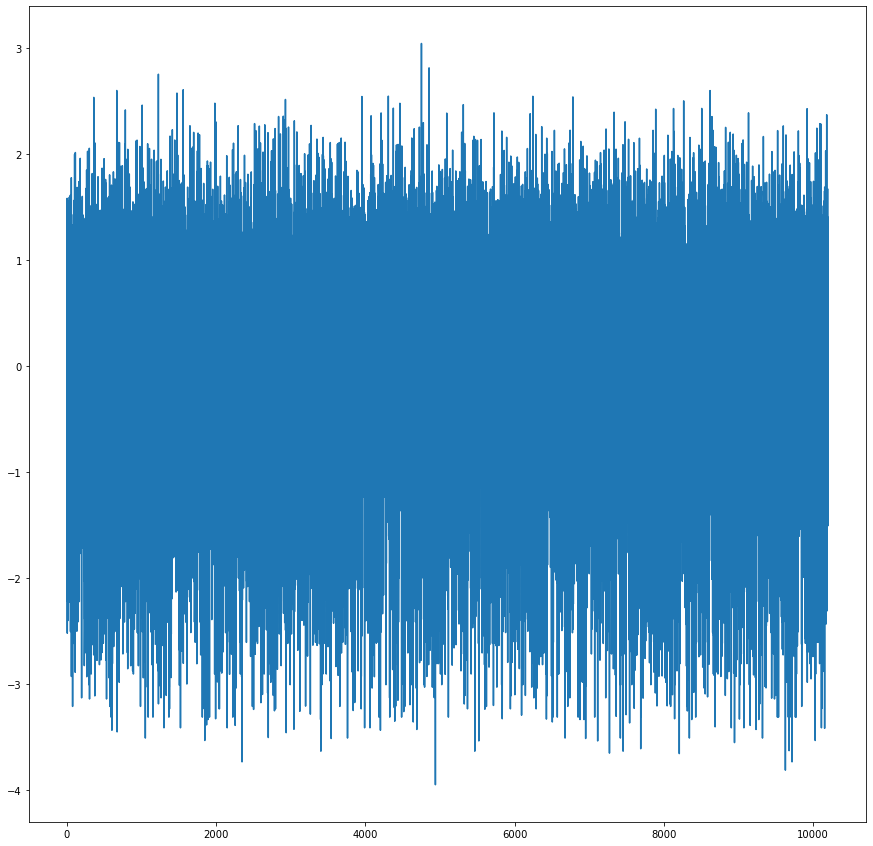

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

n = 1000
clf = LinearDiscriminantAnalysis(n_components=1).fit(
    train.drop('Y', axis=1)[:n], train['Y'][:n]
    )
train_x_embedded = clf.transform(train.drop('Y', axis=1))
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cm = train['Y']
cm = cm.replace(0, "red")
cm = cm.replace(1, "blue")
print(train_x_embedded)
#ax.scatter(train_x_embedded[:, 2], train_x_embedded[:, 0], train_x_embedded[:, 1], s = 40, c = cm)
ax.plot(train_x_embedded)
plt.show()


[LightGBM] [Info] Number of positive: 2002, number of negative: 6158
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 8160, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.245343 -> initscore=-1.123605
[LightGBM] [Info] Start training from score -1.123605
Training until validation scores don't improve for 1000 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	train's binary_logloss: 0.55218	valid's binary_logloss: 0.534471
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[20]	train's binary_logloss: 0.547331	valid's binary_logloss: 0.529809
[30]	train's b

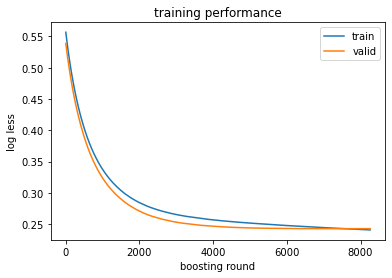

[LightGBM] [Info] Number of positive: 2003, number of negative: 6157
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 8160, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.245466 -> initscore=-1.122944
[LightGBM] [Info] Start training from score -1.122944
Training until validation scores don't improve for 1000 rounds
[10]	train's binary_logloss: 0.552246	valid's binary_logloss: 0.53399
[20]	train's binary_logloss: 0.547352	valid's binary_logloss: 0.529393
[30]	train's binary_logloss: 0.54255	valid's binary_logloss: 0.524883
[40]	train's binary_logloss: 0.537871	valid's binary_logloss: 0.520513
[50]	train's binary_logloss: 0.533336	valid's binary_logloss: 0.516256
[60]	train's binary_logloss

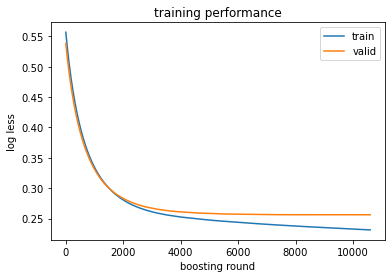

[LightGBM] [Info] Number of positive: 1933, number of negative: 6227
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 8160, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.236887 -> initscore=-1.169821
[LightGBM] [Info] Start training from score -1.169821
Training until validation scores don't improve for 1000 rounds
[10]	train's binary_logloss: 0.542531	valid's binary_logloss: 0.573034
[20]	train's binary_logloss: 0.537747	valid's binary_logloss: 0.567931
[30]	train's binary_logloss: 0.533081	valid's binary_logloss: 0.562971
[40]	train's binary_logloss: 0.528525	valid's binary_logloss: 0.558114
[50]	train's binary_logloss: 0.524057	valid's binary_logloss: 0.553366
[60]	train's binary_loglo

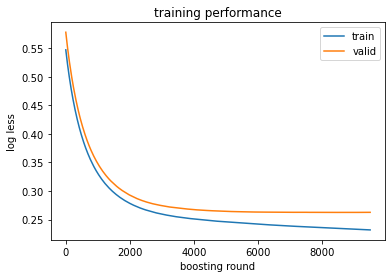

[LightGBM] [Info] Number of positive: 1979, number of negative: 6181
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 8160, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242525 -> initscore=-1.138888
[LightGBM] [Info] Start training from score -1.138888
Training until validation scores don't improve for 1000 rounds
[10]	train's binary_logloss: 0.548925	valid's binary_logloss: 0.546817
[20]	train's binary_logloss: 0.544028	valid's binary_logloss: 0.541931
[30]	train's binary_logloss: 0.539267	valid's binary_logloss: 0.537193
[40]	train's binary_logloss: 0.534612	valid's binary_logloss: 0.532546
[50]	train's binary_logloss: 0.530054	valid's binary_logloss: 0.528008
[60]	train's binary_loglo

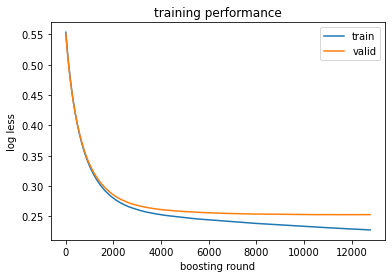

[LightGBM] [Info] Number of positive: 1963, number of negative: 6197
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 8160, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240564 -> initscore=-1.149591
[LightGBM] [Info] Start training from score -1.149591
Training until validation scores don't improve for 1000 rounds
[10]	train's binary_logloss: 0.546721	valid's binary_logloss: 0.555816
[20]	train's binary_logloss: 0.541854	valid's binary_logloss: 0.550882
[30]	train's binary_logloss: 0.537116	valid's binary_logloss: 0.54608
[40]	train's binary_logloss: 0.532495	valid's binary_logloss: 0.541412
[50]	train's binary_logloss: 0.527961	valid's binary_logloss: 0.53681
[60]	train's binary_logloss

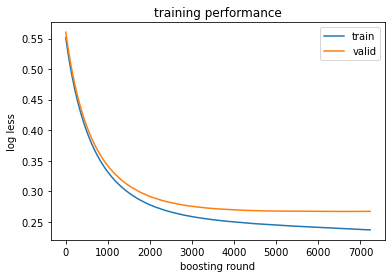

In [65]:
import lightgbm as lgb
import numpy as np

val_preds = np.zeros(len(train))

params = {
"objective" : "binary",
"metric" : "binary_logloss",
"learning_rate" : 0.001,
"num_iterations" : 20000,
"num_leaves" : 11,
"max_depth" : 4,
"min_data_in_leaf" : 0,
"bagging_fraction" : 0.8,
"bagging_freq" : 3,
"lambda_l2" : 1,
"lambda_l1" : 1,
"seed" : 42,
"n_jobs" : -1
}

models=[]

for train_indices, val_indeices in kf.split(train):
  train_kfold, val_kfold = train.iloc[train_indices], train.iloc[val_indeices]
  X_train, X_val = train_kfold.drop('Y', axis=1), val_kfold.drop('Y', axis=1)
  Y_train, Y_val = train_kfold['Y'], val_kfold['Y']
  X_train.columns = X_train.columns.map(namemap)
  X_val.columns = X_val.columns.map(namemap)

  train_dataset = lgb.Dataset(X_train[numeric_cols], Y_train)
  val_dataset = lgb.Dataset(X_val[numeric_cols], Y_val, reference=train_dataset)

  evaluation_results = {}
  model = lgb.train(
    params, 
    train_dataset, 
    valid_sets=[train_dataset, val_dataset],
    verbose_eval=10,
    early_stopping_rounds=1000,
    num_boost_round=10000,
    evals_result=evaluation_results,
    valid_names=['train', 'valid']
    )
  plt.plot(evaluation_results['train']['binary_logloss'], label='train')
  plt.plot(evaluation_results['valid']['binary_logloss'], label='valid')
  plt.ylabel('log less')
  plt.xlabel('boosting round')
  plt.title('training performance')
  plt.legend()
  plt.show()

  models.append(model)
  val_preds[val_indeices] = model.predict(X_val[numeric_cols])


In [67]:
from sklearn.metrics import accuracy_score
val_preds_result = np.where(val_preds<0.5, 0, 1)
print(val_preds_result)
accuracy_score(train['Y'], val_preds_result)


[0 0 0 ... 1 0 0]


0.8790196078431373

In [68]:
test_id = pd.read_csv("../data/test.csv")['id']
test.columns = test.columns.map(namemap)

X_test = test[numeric_cols]


KeyError: "None of [Index(['0', '1', '2', '3', '5', '6', '7', '8', '9', '10', '11', '12', '13',\n       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',\n       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',\n       '38', '39'],\n      dtype='object')] are in the [columns]"

In [ ]:
preds=[]

for i, model in enumerate(models):
  preds.append(model.predict(X_test))

preds = np.array(preds)


In [ ]:
preds.shape
print(preds)

preds_mean = preds.mean(axis = 0)
preds_mean = np.where(preds_mean < 0.5, 0, 1)
print(preds_mean)


[[0.02484526 0.01536433 0.42993961 ... 0.02274609 0.00266845 0.00178508]
 [0.01596317 0.00815803 0.37241404 ... 0.02187771 0.00143118 0.00186915]
 [0.01801675 0.0117682  0.42538749 ... 0.01949205 0.00168001 0.00215539]
 [0.0190974  0.00899021 0.48675592 ... 0.0160147  0.00093021 0.00122486]
 [0.0135421  0.0058482  0.37098195 ... 0.01561829 0.00187014 0.00192152]]
[0 0 0 ... 0 0 0]


In [ ]:
submit = np.c_[test_id, preds_mean]

np.savetxt("submission.csv", submit, delimiter=',', fmt="%.0f")
